In [9]:
#Importing Libraries and Packages
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import requests
from io import StringIO
from collections import Counter
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import NMF

In [10]:
#Reading in Dataframe from project github repository
url_train = 'https://raw.githubusercontent.com/JSchlangen9/News-Classification/main/BBC%20News%20Train.csv'
url_test = 'https://raw.githubusercontent.com/JSchlangen9/News-Classification/main/BBC%20News%20Test.csv'
file_train = requests.get(url_train)
file_test = requests.get(url_test)
string_train = StringIO(file_train.text)
string_test = StringIO(file_test.text)

df_train = pd.read_csv(string_train)
df_test = pd.read_csv(string_test)

(array([336.,   0., 261.,   0.,   0., 274.,   0., 346.,   0., 273.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

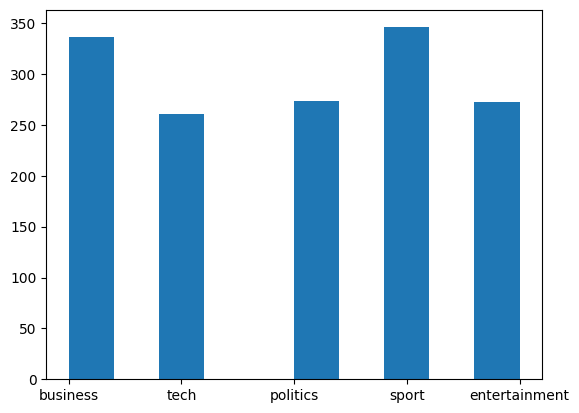

In [11]:
plt.hist(df_train['Category'])


In [12]:
lengths = []
for i in range(len(df_train)):
    lengths.append(len(df_train.iloc[i]['Text']))

df_train['length'] = lengths

plt.hist(df_train['length'], color='green', ec='black', bins=100)

TypeError: 'numpy.ndarray' object is not callable

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 [Text(0, 0, 'to'),
  Text(1, 0, 'the'),
  Text(2, 0, 'in'),
  Text(3, 0, 'of'),
  Text(4, 0, 'she'),
  Text(5, 0, 'we'),
  Text(6, 0, 'bank'),
  Text(7, 0, 'o'),
  Text(8, 0, 'ssl'),
  Text(9, 0, 'life'),
  Text(10, 0, 'mitsubishi'),
  Text(11, 0, 'a'),
  Text(12, 0, 'and'),
  Text(13, 0, 'v'),
  Text(14, 0, '(leinster)'),
  Text(15, 0, 'that'),
  Text(16, 0, 's'),
  Text(17, 0, 'is'),
  Text(18, 0, 'children'),
  Text(19, 0, 'he'),
  Text(20, 0, 'sizzla'),
  Text(21, 0, 'i'),
  Text(22, 0, 'nissan'),
  Text(23, 0, 'microsoft'),
  Text(24, 0, 'johnson'),
  Text(25, 0, 'number'),
  Text(26, 0, 'they'),
  Text(27, 0, 'was'),
  Text(28, 0, 'mci'),
  Text(29, 0, '-'),
  Text(30, 0, 'arrested'),
  Text(31, 0, 'absa'),
  Text(32, 0, 'sales'),
  Text(33, 0, 'for'),
  Text(34, 0, 'mr')])

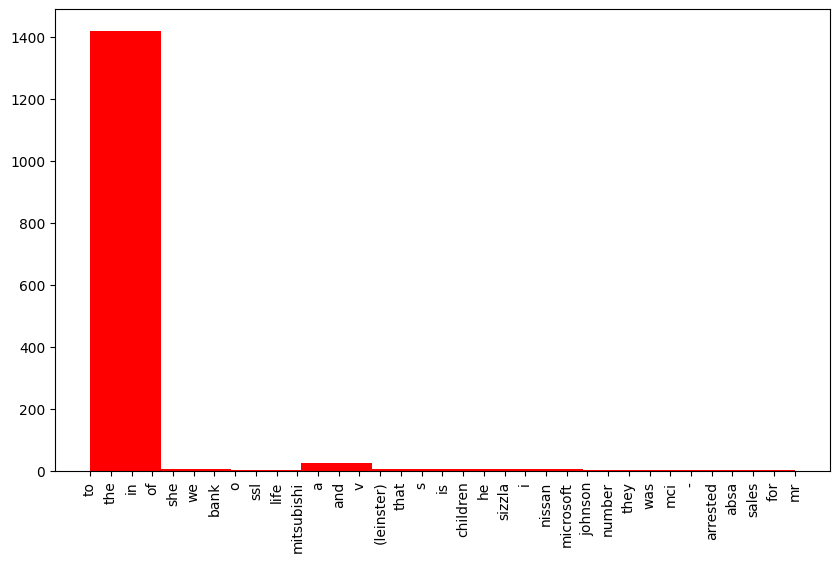

In [5]:
commons = []
for i in range(len(df_train)):
    string = df_train.iloc[i]['Text']
    split_it = string.split()
    word_count = Counter(split_it)
    most_occur = word_count.most_common()[0][0]
    commons.append(most_occur)

df_train['most_common'] = commons

plt.figure(figsize=(10,6))
plt.hist(df_train['most_common'], color='red')
plt.xticks(rotation=90)

In [8]:
vectors = []
for i in range(len(df_train)):
    mod = Word2Vec(df_train.iloc[i]['Text'])
    vectors.append(mod.wv.vectors.sum())

model = NMF(max_iter=100000)
W = model.fit_transform(np.array(vectors).reshape(-1, 1))
H = model.components_

vals = np.matmul(W, H.transpose())
topics = {-2:'sport', -1:'politics', 0:'business', 1:'entertainment', 2:'tech'}

range = max(vals) - min(vals)
avg = sum(vals) / len(vals)

vals = np.round(2*((vals - avg) / range))

TypeError: 'numpy.ndarray' object is not callable

In [7]:
ans = df_train['Category'].tolist()
for i in range(len(ans)):
    if ans[i] == 'sport':
        ans[i] = -2
    elif ans[i] == 'politics':
        ans[i] = -1
    elif ans[i] == 'business':
        ans[i] = 0
    elif ans[i] == 'entertainment':
        ans[i] = 1
    elif ans[i] == 'tech':
        ans[i] = 2

accuracy_score(ans, vals)

TypeError: 'numpy.ndarray' object is not callable